In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour les modèles ML et les métriques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)


In [2]:
df = pd.read_csv("fraudTrain.csv")

print(df.shape)
df.head()

(1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# Vérifier les valeurs uniques de la cible
print(df['is_fraud'].value_counts())

# Calcul du ratio d'imbalance
fraud_count = df['is_fraud'].sum()
non_fraud_count = len(df) - fraud_count
imbalance_ratio = non_fraud_count / fraud_count

print(f"Nombre de fraudes : {fraud_count}")
print(f"Nombre de non-fraudes : {non_fraud_count}")
print(f"Ratio de déséquilibre : 1:{imbalance_ratio:.2f}")

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Nombre de fraudes : 7506
Nombre de non-fraudes : 1289169
Ratio de déséquilibre : 1:171.75


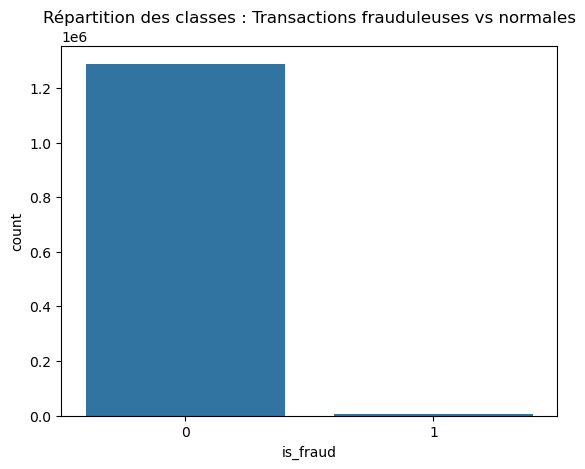

In [4]:
sns.countplot(data=df, x='is_fraud')
plt.title("Répartition des classes : Transactions frauduleuses vs normales")
plt.show()

Here we have 1:171 ratio between fraud and non fraud element. The accuracy of the model will be surelly very high but we do not have to care about that. Our goal is to have a good recall score because we have to detect well to few numbers of fraud we have.

Accuracy : 0.9936530052467462
Precision : 0.0
Recall : 0.0
F1-score : 0.0

Classification Report :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



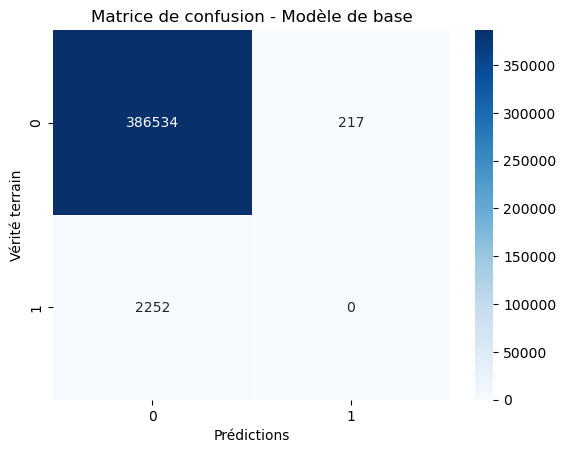

In [9]:

df_model = df.drop(columns=['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 
                            'city', 'state', 'zip', 'job', 'dob', 'merchant', 'trans_num'])


df_model = pd.get_dummies(df_model, drop_first=True)


X = df_model.drop('is_fraud', axis=1)
y = df_model['is_fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


print("\nClassification Report :")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion - Modèle de base")
plt.show()

## Utilisation de SMOTE pour rajouter des frandes dans l'échantillon de train

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

# Vérifier les dimensions de départ
print("Avant SMOTE :", X_train.shape, y_train.value_counts())

# Appliquer SMOTE sur le jeu d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Vérifier le nouvel équilibre
print("\nAprès SMOTE :", X_train_res.shape, y_train_res.value_counts())

Avant SMOTE : (907672, 22) is_fraud
0    902418
1      5254
Name: count, dtype: int64

Après SMOTE : (1804836, 22) is_fraud
0    902418
1    902418
Name: count, dtype: int64


----- Résultats après SMOTE -----
Recall : 0.7699822380106572
Precision : 0.08593517692536426
F1-score : 0.15461435577351762
----- Classification Report après SMOTE -----

              precision    recall  f1-score   support

           0     0.9986    0.9523    0.9749    386751
           1     0.0859    0.7700    0.1546      2252

    accuracy                         0.9513    389003
   macro avg     0.5423    0.8611    0.5648    389003
weighted avg     0.9933    0.9513    0.9702    389003



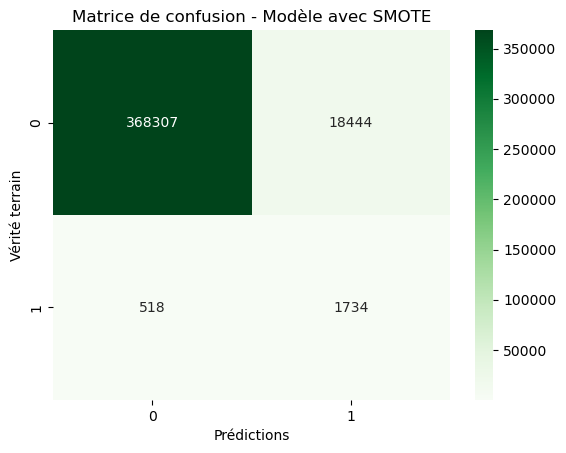

In [14]:
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_res, y_train_res)

# Prédictions sur le jeu de test (non rééchantillonné)
y_pred_smote = model_smote.predict(X_test)
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]

print("----- Résultats après SMOTE -----")
print("Recall :", recall_score(y_test, y_pred_smote))
print("Precision :", precision_score(y_test, y_pred_smote))
print("F1-score :", f1_score(y_test, y_pred_smote))

print("----- Classification Report après SMOTE -----\n")
print(classification_report(y_test, y_pred_smote, digits=4))

cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion - Modèle avec SMOTE")
plt.show()

## On va utiliser balanced pour pénaliser le modèle quand il se trompe sur les fraudes

In [15]:
from sklearn.linear_model import LogisticRegression

model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_balanced.fit(X_train, y_train)

y_pred_balanced = model_balanced.predict(X_test)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    386751
           1       0.09      0.77      0.16      2252

    accuracy                           0.95    389003
   macro avg       0.54      0.86      0.57    389003
weighted avg       0.99      0.95      0.97    389003

